# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [59]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print ("Dataset has {} rows, {} columns".format(*data.shape))
print (data.head() ) # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:PCA finds vectors that explains the variance of the data. Since, we are looking at data from a wholesale grocery distributor, we would expect the first PCA dimension to be products that require daily delivery. This would include products like Milk, Fresh Food and Grocery.The first few PCA dimensions will be those that account for the highest proportion of variation in the output. We would expect them to be composed of original features that are correlated in some way: perhaps they are combinations of items that customers tend to purchase together, such as 'fresh' and 'grocery' products.
For ICA, we would expect all the features to be included and thus would receive a matrix containing six features. ICA will return a matrix that consists of all the six features. In ICA, we're finding basis vectors that are statistically independent of the projected data. This will be used for creating a clear boundary such that the dimensions are not dependent on each other.The ICA dimensions will be dimensions that are independent of one another. It seems like 'delicatessen' and 'detergents_paper' are classes that would not be strongly correlated to other classes insofar as customer purchases are concerned, so they would likely show up as ICA dimensions.
Thus, in our case our observables are nothing but the exports of different commodities and what we are trying to get (hidden variables) is the customer segments. Therefore we would expect commodities that are indepedendent of each other as our output features. This would help us in defining the clear boundary.

###PCA

6
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


(0, 0.50000000000000011)

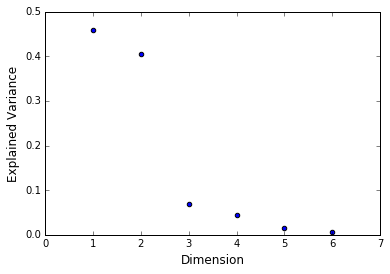

In [60]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
n = min(data.shape)
print (n)
pca = PCA(n_components=n).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print (pca.components_)
print (pca.explained_variance_ratio_)
plt.scatter(range(1,n+1), pca.explained_variance_ratio_)
plt.xlabel('Dimension', size=12)
plt.ylabel('Explained Variance', size=12)
plt.ylim(0)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: PCA orders its output in terms of explained variance, i.e. the fraction of variance in the data explained by the relationships encoded in each principal component. So we know that the first pricipal component explains more of the variance than any other, the second component more than any other but the first and so on down the line. In our example, the first two principal components account for 46.0% and 40.5% of the variance in the data respectively. In contrast, the third principal component accounts for only 7.0% of the variance. It is clear from the plot above that the explained variance drops off rapidly after the first two components.
These results suggest that a total of two principal component dimensions is the ideal number for our data. The first two dimensions explain almost 86.5% of the variance in the data set. Of course we could explain more of the variance by including additional dimensions, but then we run the risk of overfitting and the increase in model variance error that comes with it (variance here refers to the type of modelling error, rather than the distribution of the original data set that we had been discussing earlier). Having said that, the ideal number of two dimensions was arrived at be heuristic means, and the proper way to do it would be to train models with different numbers of dimensions, perhaps using the feature selection technique, then see how they perform on test data. Nevertheless, based only on the analysis at hand, we choose to work with two dimensions.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first principal component explains a major portion of Fresh Produce and a small portion of Milk and Frozen.The first principal component dimension has a coefficient of -0.98 for the 'fresh' feature, -0.15 for the 'frozen' feature and so on. It's pretty obvious that the first principal component is predominantly the 'fresh' feature vector rotated a bit away from the original. There is no reason that the most principal component need elucidate a strong covariance relationship between features. According to the README doc, the 'fresh' feature has the largest variance of any feature, and we attribute this, at least in part, to scale: the shops spend 50% more on average on 'fresh' items than on those from any other category. There is no need for 'fresh' to correlate to any other feature to have a great influence on total variance. There just needs to be a lot of variation from shop to shop on how much they spend on 'fresh' items. We can use this finding to suggest our wholesale distributor client increase marketing on 'fresh' products to shops who don't buy much of it, as there seems to be a great but uneven demand for 'fresh' products across the client's customer base.
The second principal component explains a major portion of Milk, Grocery, Detergents_Paper and Delicatessen
The dimensions represent eigen vectors and the directions along the variation of the data. As seen from the lectures, PCA begins by converging to the center of the dataset and projects its axes along the spread of the data. Using the information as shown in the graph above, we find that the first two principal components explain almost 85-86% of the variability in the dataset.
This would mean that if we were to include only these two features in the training of the algorithm, we woud account for maximum coverage of the variablity in the dataset and not lose on much information.
PCA provides dimensionality reduction for visualisation of data and also to extract valuable information. It also make it possible for identifying latent features and make proper use of the data without increasing computation cost.

###ICA

In [61]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
# import seaborn as sns
n = min(data.shape)
centered = data.copy()
centered -= centered.mean()
ica = FastICA(n_components=n, random_state=42).fit(data)

# Print the independent components
print (ica.components_)
ica.fit(centered)
#plotting heat map for better visulisation of matrix
#plt.figure(figsize = (11,5))
#sns.heatmap(pd.DataFrame(ica.components_,
                         #columns = list(data.columns)),annot = True)

[[  8.65203357e-07   1.40433954e-07  -7.74134859e-07  -1.11461596e-05
    5.55175206e-07   5.95231239e-06]
 [ -3.97590618e-06   8.59058328e-07   6.24232403e-07   6.77446468e-07
   -2.06101033e-06   1.04342316e-06]
 [ -2.10589800e-07   1.88727663e-06  -6.41843645e-06  -4.12230621e-07
    7.88586022e-07   1.45013212e-06]
 [  3.86436469e-07   2.19531902e-07   6.00815003e-07   5.22057330e-07
   -5.10239101e-07  -1.80925706e-05]
 [  1.53632693e-07   9.84534859e-06  -5.80984571e-06  -3.63864019e-07
    3.31536850e-06  -6.05749699e-06]
 [ -2.99843192e-07   2.30595406e-06   1.20636760e-05  -1.46257243e-06
   -2.82071883e-05  -5.73219911e-06]]


FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=6, random_state=42, tol=0.0001, w_init=None, whiten=True)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: we can get some idea of what groups of products trend together be looking at the coefficients inside each independent component vector. Within a vector, the magnitude of a coefficient tells us how important the feature to which it corresponds is to that independent component vector. By focusing on the coefficients of greatest magnitude within a vector, we can get an idea of how customers purchase products from different feature groups. If two coefficients have the same sign this implies that sales of the feature items to which they correspond trend together. If they have opposite sign, it implies that customers who buy more from one group buy less from the other. We can utilize this knowledge to better assist our wholesale distributor client optimize marketing strategies to increase sales, perhaps by offering discounts on purchases of one feature group item based on the purchase of another form a different but synergistic feature group. We can also suggest ways to maximize efficiency and cost reduction by bundling delivery of feature items that scale together.
The first independent component on the list is composed of something like 2 parts 'frozen', 1 part 'delicatessen' and smaller bits of the other features. Because the coefficients have opposite sign, we see that stores that buy more 'frozen' goods buy less 'delicatessen' goods and vice versa.
The second independent component on the list is composed of something like 4 parts 'fresh', 2 parts 'detergents_paper', 1 part 'delicatessen' and smaller bits of the other features. Again because the coefficients, we see that 'fresh' and 'detergents_paper' trend together, whereas 'delicatessen' purchases go down as the others go up.
The third independent component on the list is composed of something like 6 parts 'grocery', 2 parts 'milk', 1 part 'delicatessen' and smaller bits of the other features. We see that 'grocery' trends against 'milk' and 'delicatessen'.
The fourth independent component on the list is composed of almost entirely 'delicatessen'. 'Delicatessen seems to play an important role in all of the independent components, doesn't it? That might imply that we could segment our customer base into different groups based on how they purchase 'delicatessen' items in relation to other stuff.
The fifth independent component on the list is a mixture of a lot of stuff: 10 parts 'milk', 6 parts 'grocery', 6 parts 'delicatessen', 6 parts 'delicatessen', 3 paers 'detergents_paper' and smaller bits of the remaining features. 'Milk' and 'detergents_paper' trend together, as do 'grocery' and 'delicatessen', which of course implies they trend opposite the other two.
The sixth independent component on the list is composed of something like 6 parts 'detergents_paper', 2 parts 'grocery', 1 part 'delicatessen' and smaller bits of the other features. 'Detergents_paper' trends with 'delicatessen' and against 'grocery'.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
Advantages of K-means clustering are as follows:
Fast, robust and easier to understand.
Relatively efficient: O(tknd), where n is # objects, k is # clusters, d is # dimension of each object, and t is # iterations. Normally, k, t, d << n.
Gives best result when data set are distinct or well separated from each other. It works well when the data clusters are relatively simple in shape, like Gaussian hyperspheres, but can struggle to identify clusters properly when the clusters have more complex non-linear geometries.


Advantages of Gaussian Mixture Models:
The GMM algorithm is a good algorithm to use for the classification of static postures and non-temporal pattern recognition.
fastest algorithm for learning mixture models
Gaussian Mixture Models is a better choice, simply because it presumes less than K Means Clustering about the structure of the data. So this is the model that we will use.
Notice that both of these models presume more or less that the data are Gaussian distributed. This is at odds with the Independent Components Analysis, which presumes that the data are certainly not Gaussian distributed. For this reason, we will not be using ICA for preprocessing. We will use PCA instead.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [62]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [83]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca_reduce=PCA(n_components=2)
reduced_data = pca_reduce.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [84]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

#clusters = KMeans(n_clusters = 3).fit(reduced_data)
clusters = GMM(n_components = 3).fit(reduced_data)
print (clusters)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [85]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [86]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print (centroids)

[[-17858.6536729   10050.33930164]
 [  7007.45427668   4294.01360677]
 [   313.48539412  -6497.20521133]]


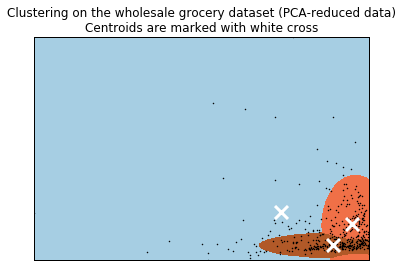

In [87]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [88]:
print (pca_reduce.inverse_transform(centroids).round(4))

[[ 28328.2243  13144.437   16734.8594   5604.7817   6427.4143   3314.7943]
 [  4682.283    7161.9356  10803.266    1923.8449   4499.7461   1292.7287]
 [ 12412.8486   2407.004    2964.1807   3145.8179    509.9457   1132.6653]]


The first row is the long and flat cluster at the bottom right, representing customers who buys more fresh products than anything else, and not a lot of other products in comparison to fresh products. This is visualized by the shape of the cluster on the x-axis, in that most of the data within that cluster are not high up on the y-axis. This cluster represents fresh products oriented customers.
The second row represents the egg shaped cluster on the far right. Because the customers in this cluster are more generalized, their buying pattern as displayed on the bar chart shows that the amount spent in each catagory of products is similar to one another. We can also tell this by the rounder shape of the cluster, and some of the data points in the cluster have similar x and y coordinates. This cluster represents general goods customers.
The last row represents the cluster that's far out from the origin at the bottom right. These customers are different from either one of the other two customer groups because their buying pattern as shown in the bar chart is different. They are not just buying fresh products because they buy a significant amount of other products, and they're not generalized buyer either because the amount in the fresh, milk, and grocery catagory is much higher than the rest. This cluster represents a variety of customers, and they can include high volume buys, general grocery customers, bulk grocery customers, and other bulk item buying customers.

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: We can see two distinct clustering of data. At the bottom right, we see that there is a close group of points. The wholesale grocery distributor distributes primarily to two different kind of customers. Large volume customer and small family run shops. Since, we received complaints from a large number of shops that are family run, delivering food products every evening becomes a problem. Thus, we find that there are two segments of customers and they are as shown in the graph above.
The bottom right cluster represents small family run shops whereas the high variable points represents large volume customers

[[  6987.95079141   4249.82914044]
 [   269.05318679  -6506.88683442]
 [-17879.18623839  10122.79246625]]


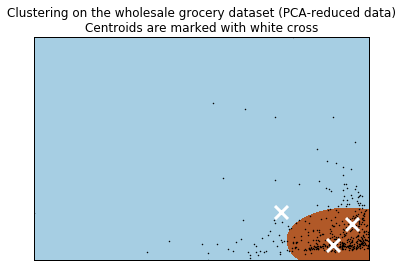

In [69]:
import matplotlib.pyplot as plt
clusters = GMM(n_components = 3).fit(reduced_data)
centroids = clusters.means_
print (centroids)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()



 As we can see there is no real boundary being created. It looks like there is a case of overfitting, as two cluster centers are very close to each other. In the case of creating customer segment, this would become a huge problem as we would be distinguishing cutomer segements based on a very fine boundary. Above is also a case of four clusters, where we overifit even worse

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
PCA along with GMM gave the best possible results. PCA helps us develop latent features and also reduces dimensions for better visualisation of data. Since, the given dataset contians only six features, PCA was still able to perform well and help reduce the data for visualisation. With the help of PCA, we were able to devise two primary principal components that best explained the variance in the dataset. We, then used the principal components to reduce the feature space to 2. This helped us primarily for visualisation of data. Now, with the results from feature transformation, we had two possible choices to cluster.
GMM provided better results from K-means, because it incorporated expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. This is primarily useful when there is no clear divide of data. Grouping the data into clusters using GMM enables us to bucket the customers into their respective market segments and thus facilitates better business decision making.
It seems that the Gaussian Mixture Model helped a lot to make sense out of the data. It tended to identify customer groups that lent themselves to easy (and hopefully correct) interpretation. We suspect it has done a better job at elucidating these details then K Means would, as we would not expect K Means to identify the long and narrow clusters that are nicely picked out by the Gaussian Mixture Model. Of course, all this was enabled by PCA which did an excellent job of collapsing six dimensions of data down to a convenient but still highly informative two.

**9)** How would you use that technique to help the company design new experiments?

Answer: 
Now that we have two market segements, we can perform A/B tests in the respective segments. Thus, we can define our control and experiment group within the market segments without affecting the other segment. This is important as large volume customers might have better equipments and facilities to cater to cheaper evening delivery as compared to smaller family run businesses. If we do not segment the cutomers, one of the segments could overpower the other resulting in anomalous conclusions.
Since we now have different segments, we can perform the A/B test and calculate the p value for the resulting tests. If we were to find that we have a p-value greater than what we consider significant, we can go ahead and implement the change. Thus,we would have favourable results from the delivery experiments.
The company can use this technique to find segments of customers that purchase a certain kind of product, say frozen foods. They can then craft various marketing initiatives, such as a wholesale discount, to A/B test on the different segments and observe the impact. If a particular change shows promise, they can be implement to select segments thereby creating and catering to their market niches.

**10)** How would you use that data to help you predict future customer needs?

Answer: Now that we have defined the customer segments, we can run different tests to help increase profit, growth and supply of the products that caters to the particular segment. Suppose the high volume customers had profit figures along with growth potential, The company could ficus on strategies to better cater to their needs while avoiding to provide support to smaller business that do not give a good turnover.
We could also better sell products, if we know the demand of each segments. Also, using apriori algorithms we can employ market basket techniques to supplement sales of more products that go hand in hand with the current imports. All these predictions allows the company to be proactive in it's approach to better serve it's customers.
We could also potential feed this mode to a supervised model to predict the new customer in one of the segments given their import quantities. Thus we would expect future data to fall right in place with the clusters we have created. We can verify that our model is working this way. However, if most of the new points are outliers in our model, we would need to recompute.